In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgn

filename = "../roi2"

data = np.loadtxt(filename, dtype=np.float64,delimiter=" ")

filter_b = np.load("bandpass_filter.pkl", allow_pickle=True)['ba'][0]

r = data[:,0]
g = data[:,1]
b = data[:,2]


def filter (data):
    return sgn.lfilter(filter_b,1,data)

def plotFFT(data, range=1.0):
    %matplotlib qt
    fft = np.fft.fft(data)
    #plt.plot(np.linspace(-range,range, int(range*len(fft)) ),np.fft.fftshift(fft)[len(fft)//2 - int(range*len(fft)//2):  len(fft)//2 + int(range*len(fft)//2):])
    plt.plot(np.linspace(-range,range, len(fft) ), np.fft.fftshift(np.abs((fft))))
    plt.show()


In [12]:


w, h = sgn.freqz(filter_b)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.show()


In [17]:



#plt.plot(r, color="r")
#plt.plot(g,color="g")
#plt.plot(b,color="b")
#plt.show()


plotFFT(r)
#plotFFT(filter(r),0.5)
#plt.plot(filter(r))
plt.show()


In [14]:
signal = filter(r)

fft  = np.abs((np.fft.fft(signal)))
fft_max = np.amax(fft)
index = (np.where(fft == fft_max))[0][0]


print(index)
print((index/len(fft))," Hz")
print((index/len(fft)) * 60," BPM")



1189
0.9924874791318865  Hz
59.54924874791319  BPM


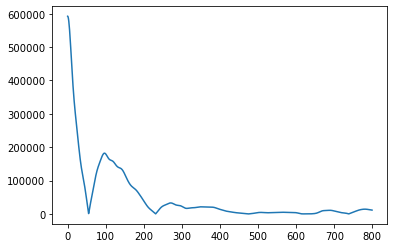

[ 97 270 350 377 507 561 627 688 780]
0.8096828046744574  Hz
48.580968280467445  BPM


In [5]:
import scipy.interpolate as intr

resample_coeff = 2
data = signal
data = sgn.resample(signal, len(signal)*resample_coeff)

def windowedcorr(x,y, maxlag):
    rxy = np.zeros(2*maxlag)
    for l in range(0, 2*maxlag):
        rxy[l] = np.sum(np.roll(x, maxlag - l)*y)
    return rxy

maxlag = 800
corr = windowedcorr(data,data,maxlag)

abs_corr = np.abs(corr)[((len(corr)//2)):len(corr)]
plt.plot(abs_corr)
plt.show()
corr_max = (sgn.find_peaks(abs_corr))[0]
print(corr_max)
print(corr_max[0]/(len(fft)*2*resample_coeff)*40, " Hz")
print((corr_max[0]*60)/(len(fft)*2*resample_coeff)*40," BPM")